In [9]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.constants import STYLE_PATH, SUMMARY_PATH
from src.data_sampler import (
    f_cosine_hc2_1_feat,
    sigma_cubic_hc2_1_feat,
)
from src.evaluation import build_eval_dataframe
from src.utils.utils_results import load_meta_model_benchmarking_results
from src.visualizations.plot_dgp import sample_and_plot_true
from src.visualizations.figure_saver import NotebookFigureSaver
from src.visualizations.plot_metrics import plot_metrics_grid_exp2
from src.visualizations.plot_model_comparison import plot_model_comparison
from src.visualizations.plot_uq_multi import plot_uq_multi

plt.style.use(STYLE_PATH)

In [10]:
FigureSaver = NotebookFigureSaver(chapter_id="02_exp2_n_repeat")
eval_df = build_eval_dataframe(SUMMARY_PATH)
eval_df_exp2 = eval_df[eval_df["experiment_name"] == "exp2_n_repeat"]
eval_df_exp2

,experiment_name,model_runs,seed,function,noise,train_interval,train_instances,train_repeats,test_interval,test_grid_length,...,nll_ood_run3,nll_ood_run4,nll_ood_run5,nll_ood_median,train_times_run1,train_times_run2,train_times_run3,train_times_run4,train_times_run5,train_times_median
0,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,0,"[-6.0, 6.0]",1000,...,-1.957709,-2.040712,-2.086045,-2.086045,0.510637,0.081553,0.097060,0.082989,0.081681,0.082989
1,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,0,"[-6.0, 6.0]",1000,...,-0.630171,-1.385903,-0.973348,-1.381431,0.089429,0.088819,0.087910,0.086203,0.086657,0.087910
2,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,0,"[-6.0, 6.0]",1000,...,-0.105877,-0.568571,-0.679778,-0.568571,0.219514,0.182436,0.178735,0.183132,0.187070,0.183132
3,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,0,"[-6.0, 6.0]",1000,...,-0.765976,-1.113681,-0.400954,-0.530101,0.623351,0.619248,0.617587,0.634276,0.645596,0.623351
4,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,1,"[-6.0, 6.0]",1000,...,-1.911005,-1.224766,-1.808556,-1.808556,0.151496,0.153778,0.152886,0.150307,0.149601,0.151496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,14,"[-6.0, 6.0]",1000,...,-0.860956,-0.803272,-0.894388,-0.894388,6.024002,6.197087,6.042990,5.981407,5.997962,6.024002
60,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,15,"[-6.0, 6.0]",1000,...,-1.918928,-1.738278,-2.108641,-1.918928,0.826316,1.086565,0.851315,0.833953,0.825903,0.833953
61,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,15,"[-6.0, 6.0]",1000,...,-0.632987,-0.628502,-0.892643,-0.764834,0.894023,0.893243,0.971970,0.904073,0.909087,0.904073
62,exp2_n_repeat,5,42,f_cosine_hc2_1_feat,sigma_cubic_hc2_1_feat,"[-4.0, 4.0]",40,15,"[-6.0, 6.0]",1000,...,0.664848,-0.266726,-0.728474,-0.266726,1.850030,1.874055,1.848279,1.895247,1.865556,1.865556


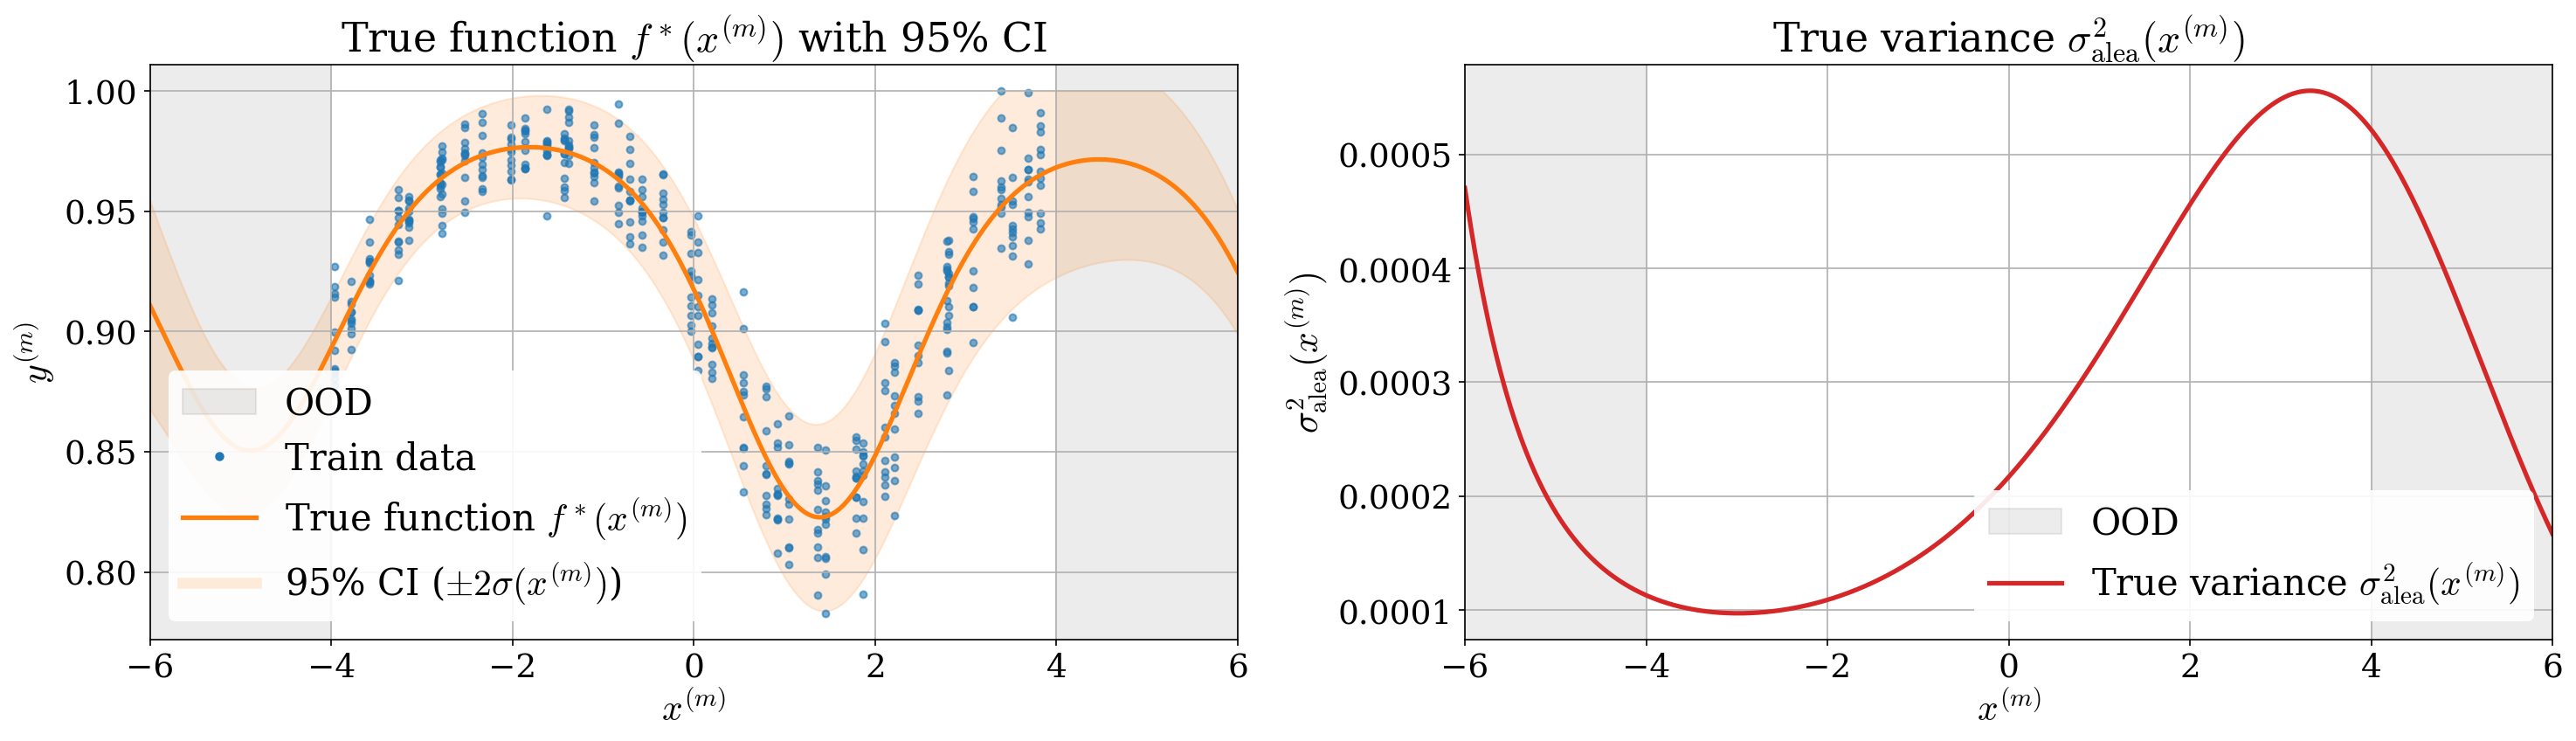

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_dgp.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_dgp.pdf


In [3]:
fig, ax = sample_and_plot_true(
    n_points=40,
    train_repeats=10,
    seed=42,
    f_true=f_cosine_hc2_1_feat,
    sigma_true=sigma_cubic_hc2_1_feat,
    figsize=(20, 6),
    ood_bounds=(-4, 4),
)
FigureSaver.save_fig(fig, "exp2_dgp")

In [4]:
def load_model_reps(model: str, suffixes: list[str]):
    BASE_FMT = ("exp2_n_repeat/{model}/"
                "seed-42_fn-1_nz-1_tri-[-4.0, 4.0]_tei-[-6.0, 6.0]_"
                "trn-40x{rep}_grid-1000_model-{model}/{stamp}")
    return [
        load_meta_model_benchmarking_results(BASE_FMT.format(model=model, rep=rep, stamp=stamp))
        for rep, stamp in enumerate(suffixes)
    ]

bbb_suffixes = ["251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1818",
                "251031_1818",
                "251031_1818",
                "251031_1819",
                "251031_1819",
                "251031_1820",
                "251031_1820",
                "251031_1821",
                "251031_1822",
                "251031_1823",
                "251031_1823",
                "251031_1824",
                ]
mcdropout_suffixes = ["251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1818",
                "251031_1818",
                "251031_1818",
                "251031_1819",
                "251031_1819",
                "251031_1820",
                "251031_1820",
                "251031_1821",
                "251031_1822",
                "251031_1822",
                "251031_1823",
                "251031_1824",
                ]
ensemble_suffixes = ["251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1818",
                "251031_1818",
                "251031_1818",
                "251031_1819",
                "251031_1819",
                "251031_1820",
                "251031_1820",
                "251031_1821",
                "251031_1822",
                "251031_1822",
                "251031_1823",
                "251031_1824",
                "251031_1825",
                ]
evidential_suffixes = ["251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1817",
                "251031_1818",
                "251031_1818",
                "251031_1818",
                "251031_1819",
                "251031_1819",
                "251031_1820",
                "251031_1820",
                "251031_1821",
                "251031_1822",
                "251031_1822",
                "251031_1823",
                "251031_1824",
                ]

bbb_reps = load_model_reps("bbb", bbb_suffixes)
mcdropout_reps = load_model_reps("mcdropout", mcdropout_suffixes)
ensemble_reps = load_model_reps("ensemble", ensemble_suffixes)
evidential_reps = load_model_reps("evidential", evidential_suffixes)

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_bbb.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_bbb.pdf


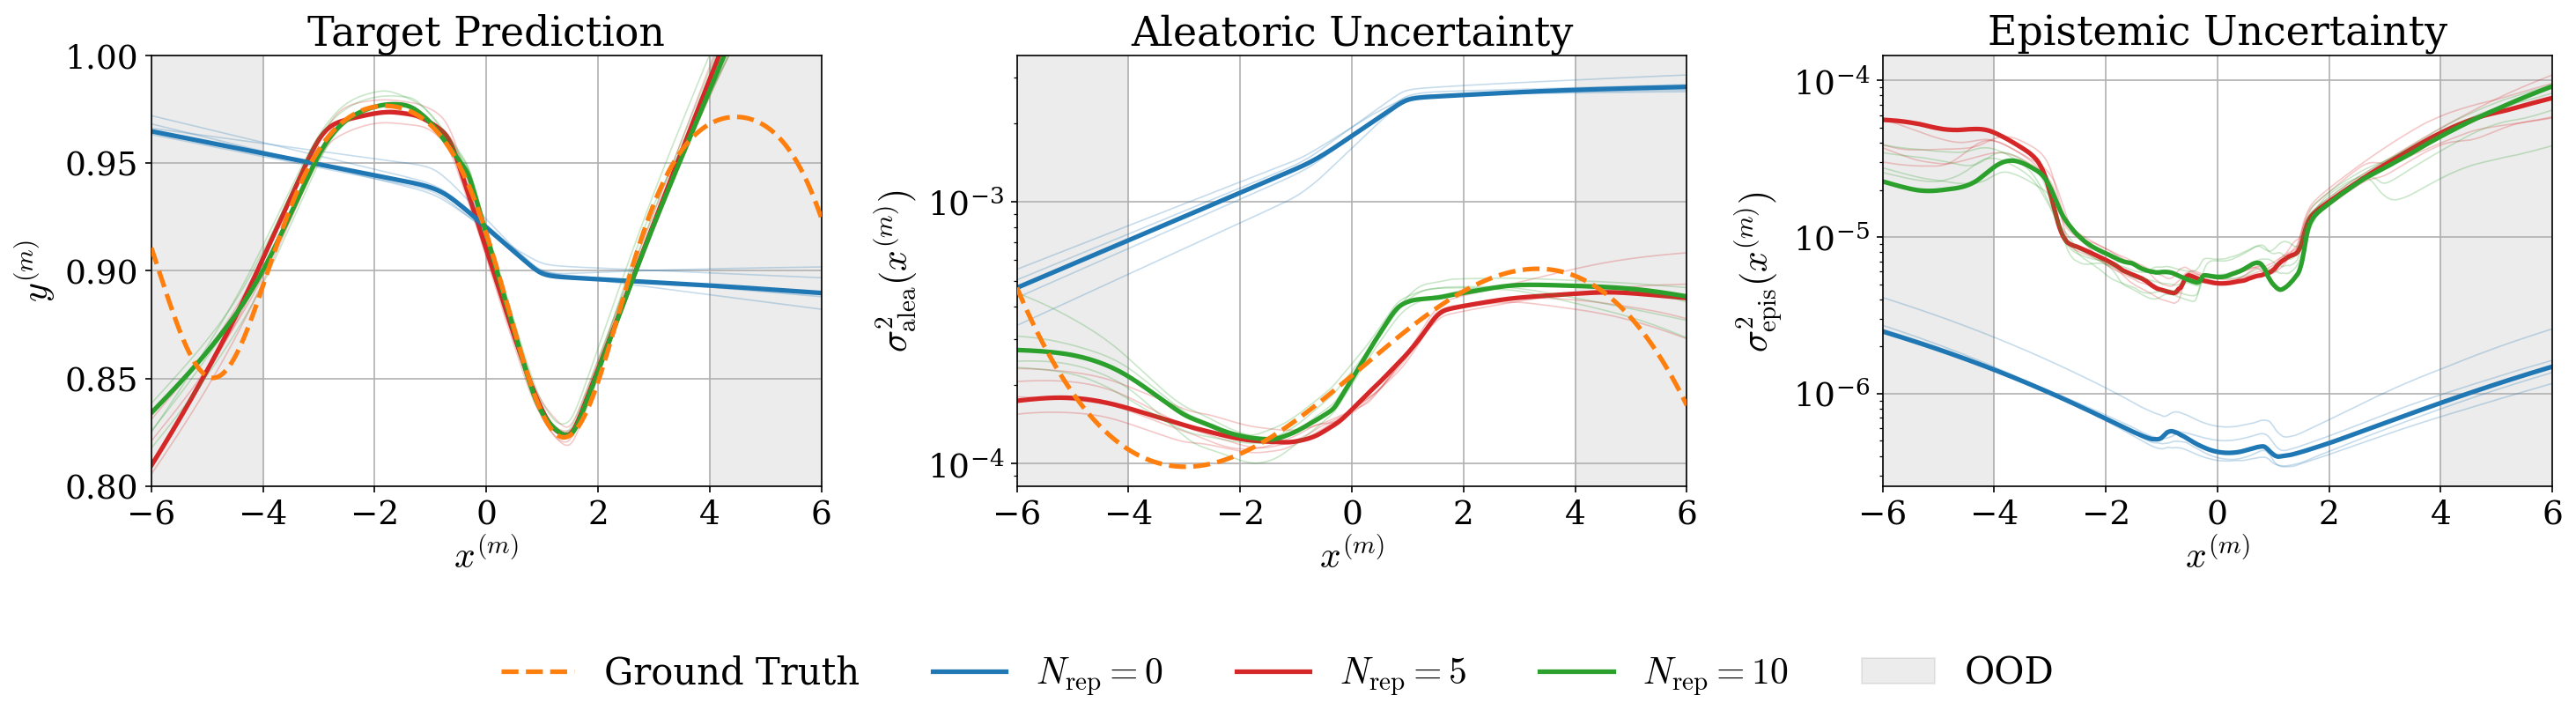

In [5]:
fig, ax = plot_uq_multi( 
    bbb_reps[0], 
    bbb_reps[5], 
    bbb_reps[10],
    labels=[r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
    ood_bounds=[(-np.inf, -4), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": True, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp2_bbb")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_mcdropout.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_mcdropout.pdf


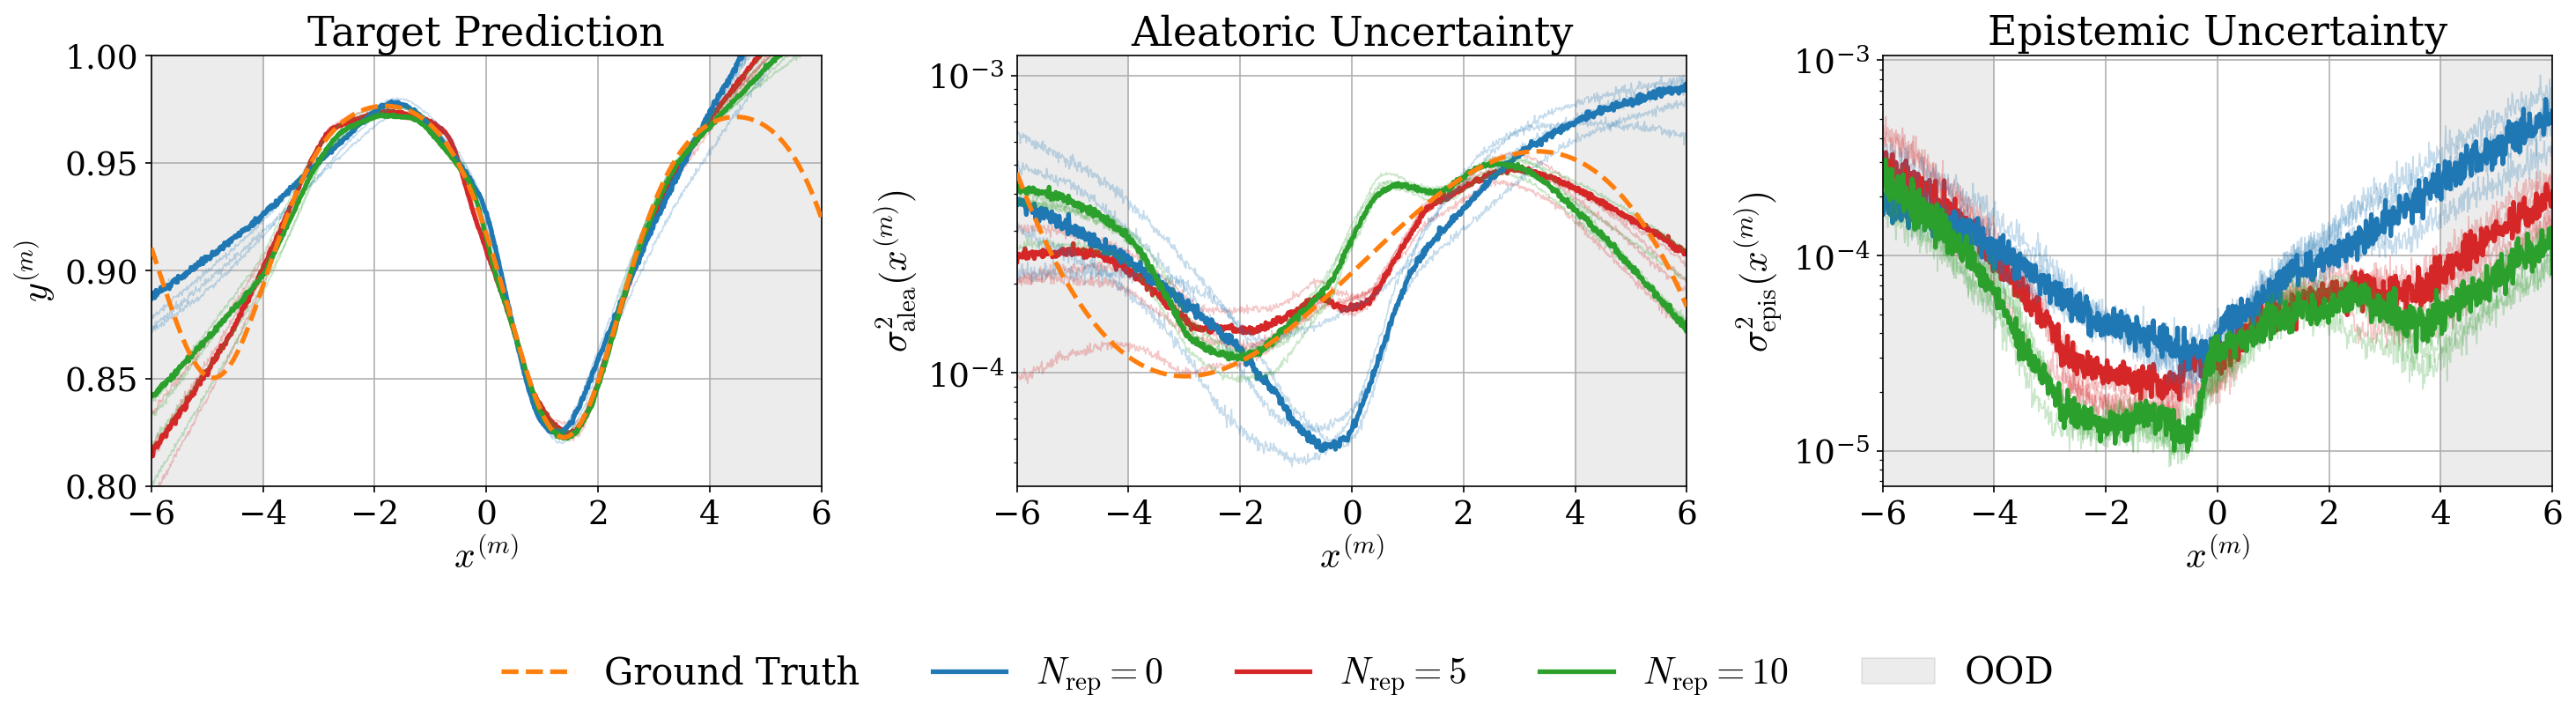

In [6]:
fig, ax = plot_uq_multi( 
    mcdropout_reps[0], 
    mcdropout_reps[5], 
    mcdropout_reps[10],
    labels=[r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
    ood_bounds=[(-np.inf, -4), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": True, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp2_mcdropout")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_ensemble.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_ensemble.pdf


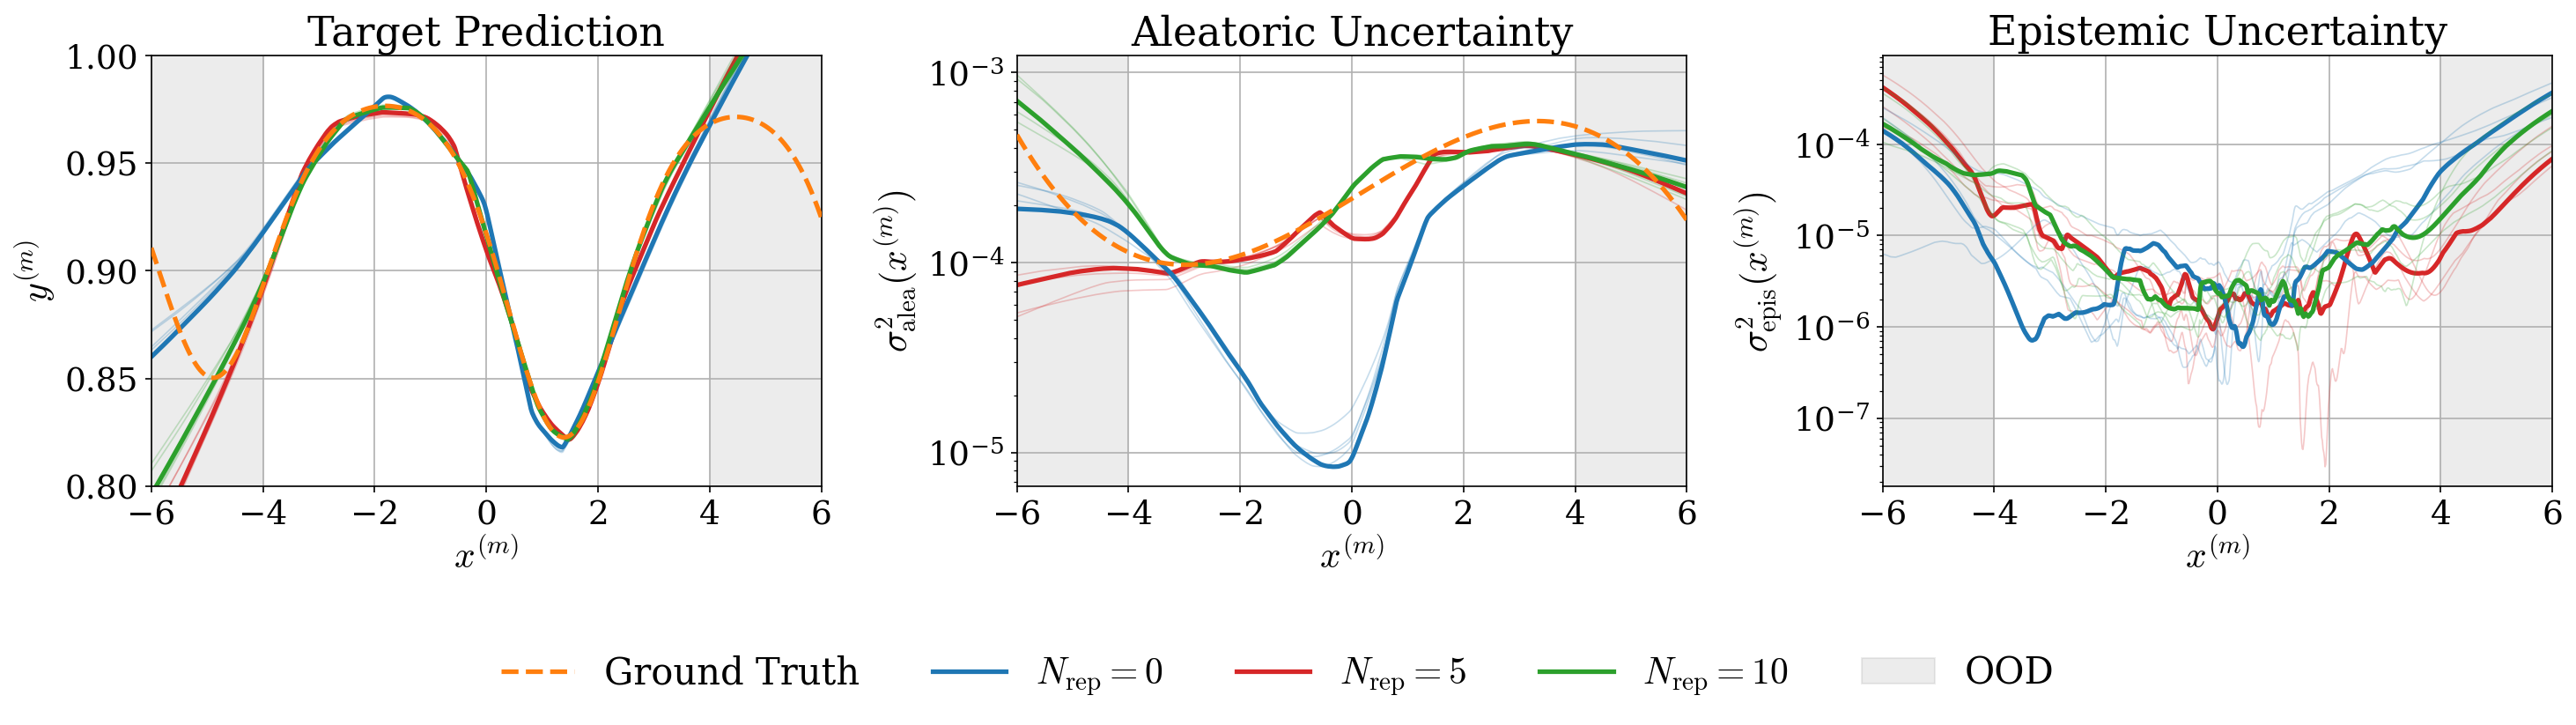

In [7]:
fig, ax = plot_uq_multi( 
    ensemble_reps[0], 
    ensemble_reps[5], 
    ensemble_reps[10],
    labels=[r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
    ood_bounds=[(-np.inf, -4), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": True, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp2_ensemble")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_evidential.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_evidential.pdf


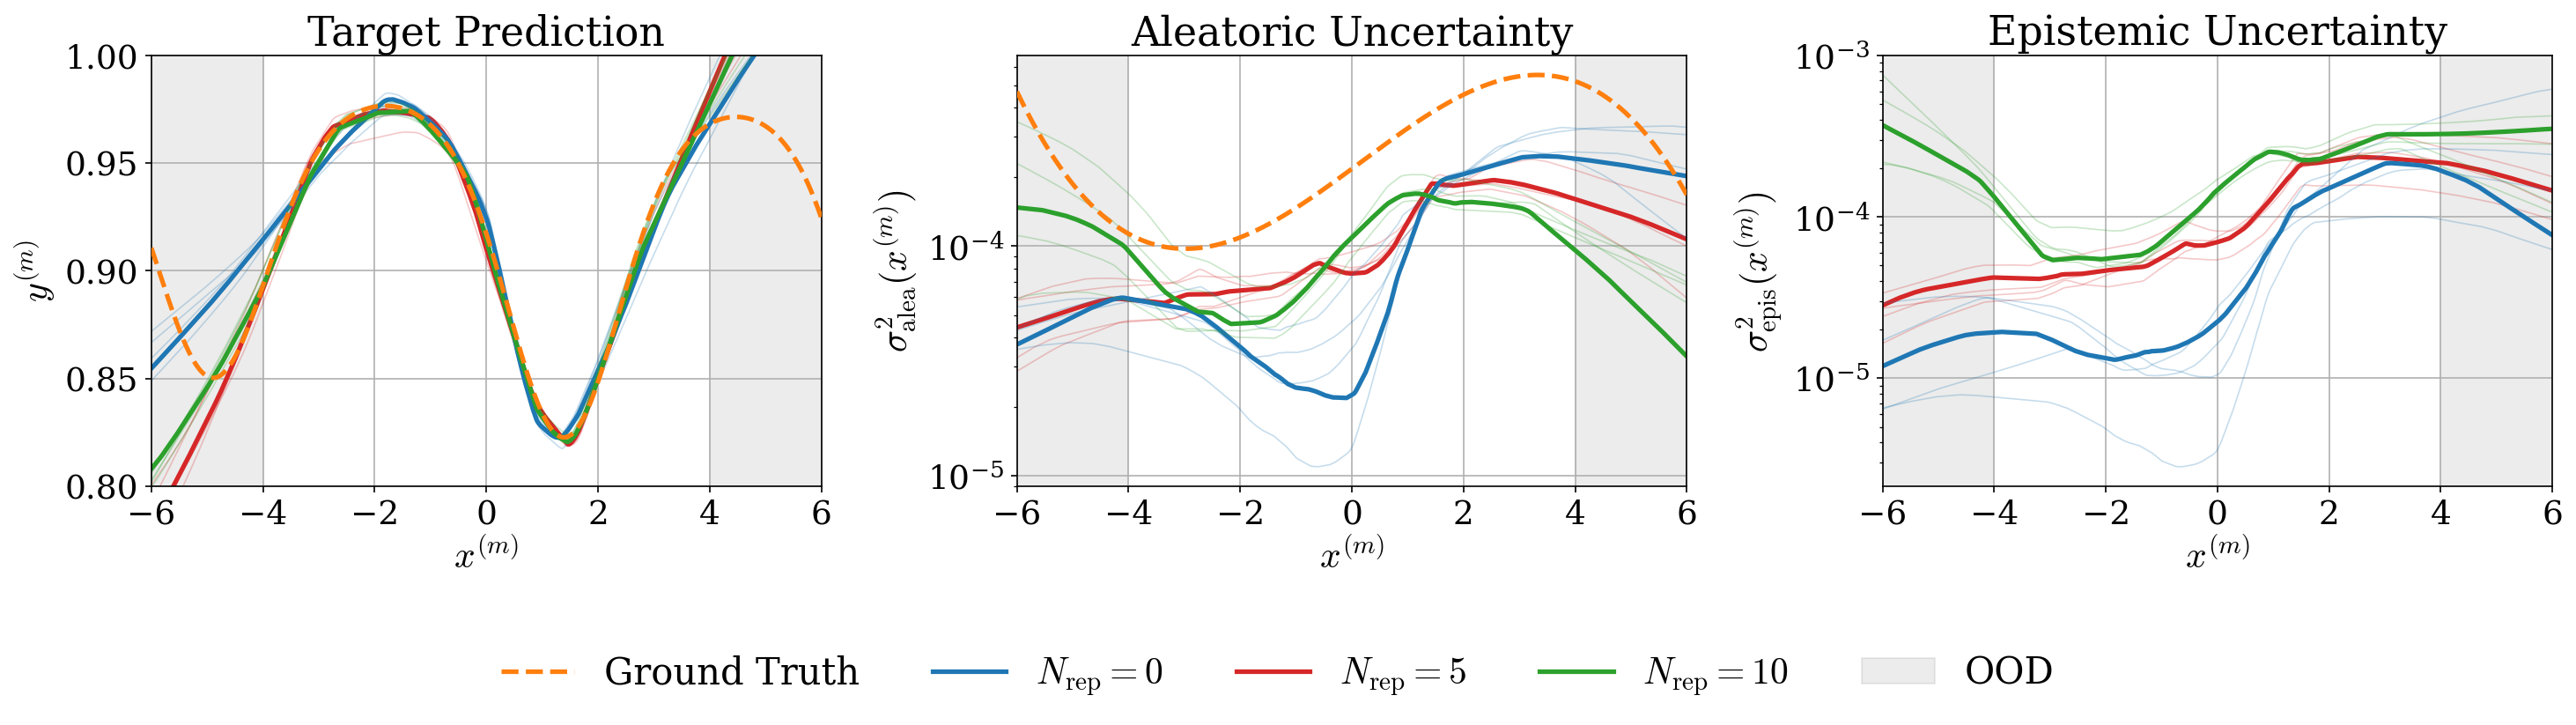

In [11]:
fig, ax = plot_uq_multi( 
    evidential_reps[0], 
    evidential_reps[5], 
    evidential_reps[10],
    labels=[r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
    ood_bounds=[(-np.inf, -4), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": True, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp2_evidential")

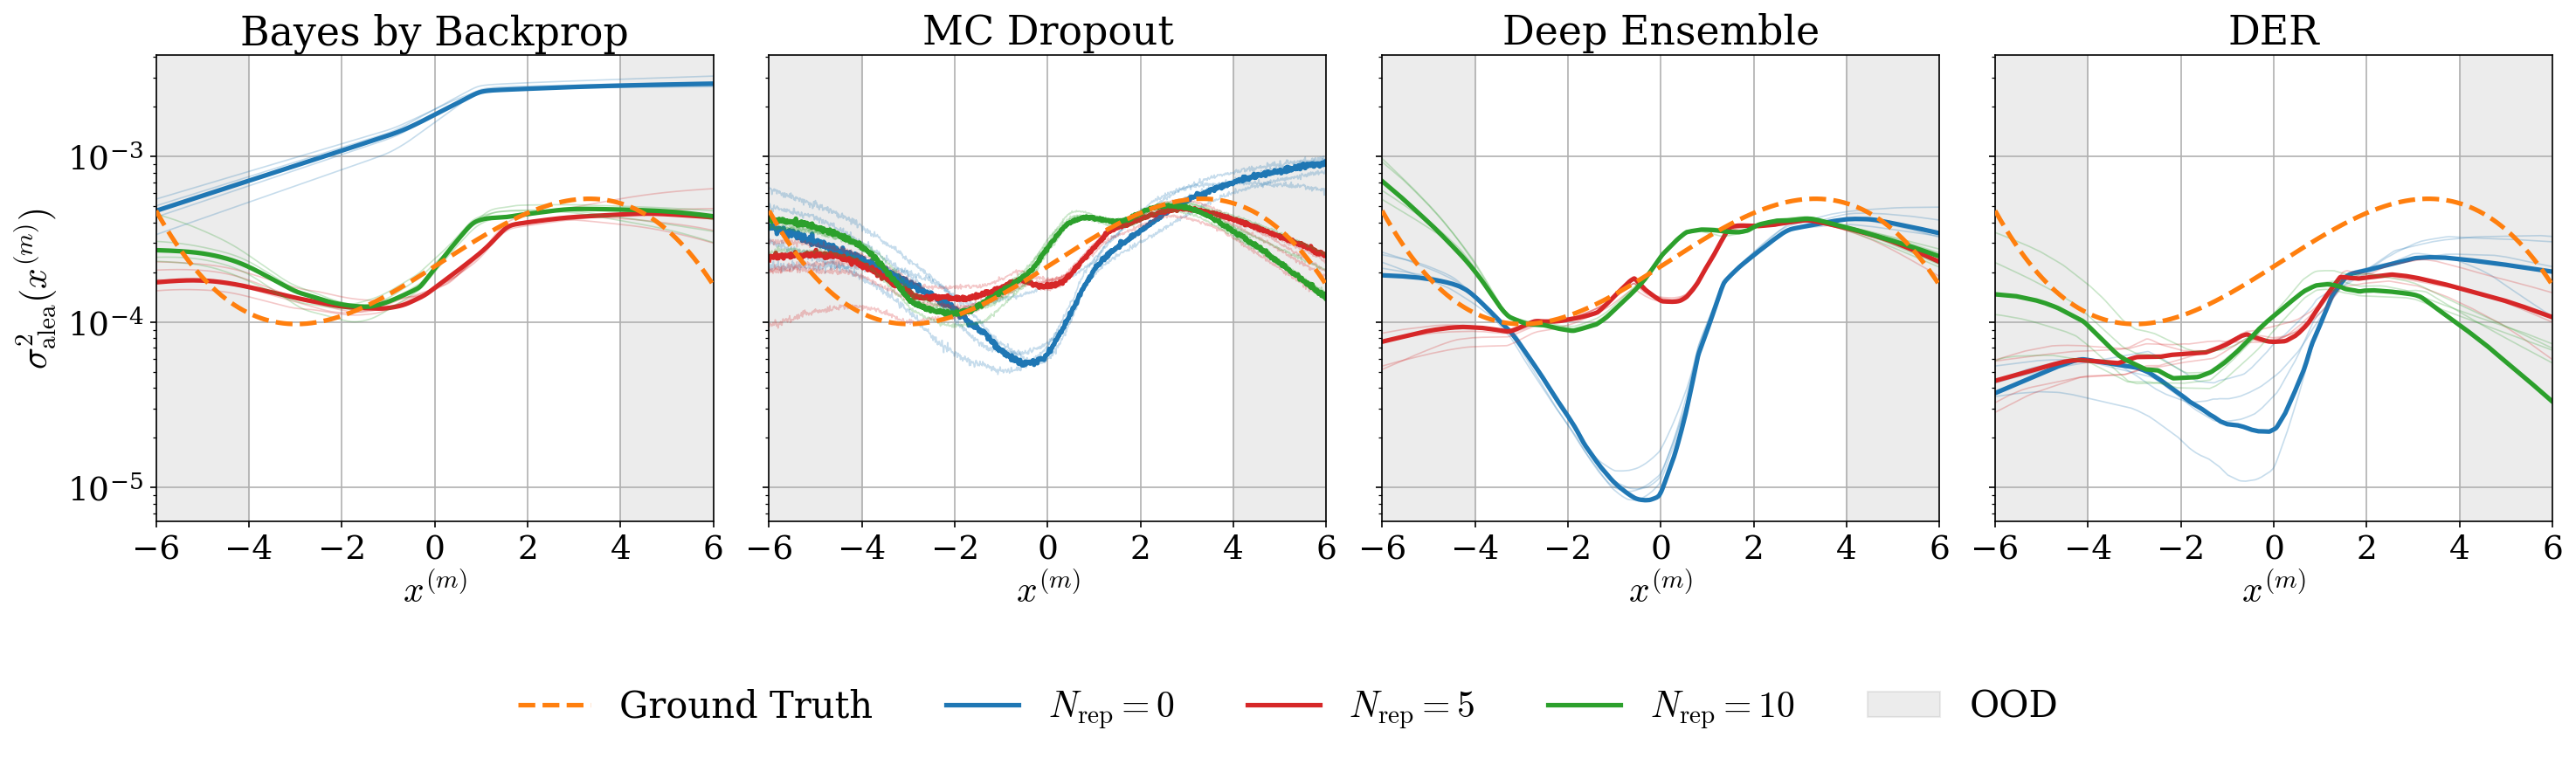

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_aleatoric_model_comparison.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_aleatoric_model_comparison.pdf


In [8]:
fig, leg = plot_model_comparison(
    groups=[
        [bbb_reps[0], bbb_reps[5], bbb_reps[10]],
        [mcdropout_reps[0], mcdropout_reps[5], mcdropout_reps[10]],
        [ensemble_reps[0], ensemble_reps[5], ensemble_reps[10]],
        [evidential_reps[0], evidential_reps[5], evidential_reps[10]],
    ],
    labels = [
        [r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
        [r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
        [r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
        [r"$N_{\text{rep}} = 0$", r"$N_{\text{rep}} = 5$", r"$N_{\text{rep}} = 10$"],
    ],
    metric="aleatoric",
    column_titles=["Bayes by Backprop", "MC Dropout", "Deep Ensemble", "DER"],
    ood_bounds=[
        [(-np.inf, -4), (4, np.inf)],
        [(-np.inf, -4), (4, np.inf)],
        [(-np.inf, -4), (4, np.inf)],
        [(-np.inf, -4), (4, np.inf)],
    ],
    x_min=[-6, -6, -6, -6],
    x_max=[ 6,  6,  6,  6],
    y_limits=None,
    y_logscale=[True, True, True, True],
    show_runs=True,
    figsize=(20, 6),
    model_colors=[
        ["tab:blue", "tab:red", "tab:green"],
        ["tab:blue", "tab:red", "tab:green"],
        ["tab:blue", "tab:red", "tab:green"],
        ["tab:blue", "tab:red", "tab:green"],
    ],
    share_yaxis=True
)
FigureSaver.save_fig(fig, "exp2_aleatoric_model_comparison")

/Users/scheuringp/Coding/uq-algorithm-selection/src/visualizations/metrics_grid.py:595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 1])


Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_metrics.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/02_exp2_n_repeat/exp2_metrics.pdf


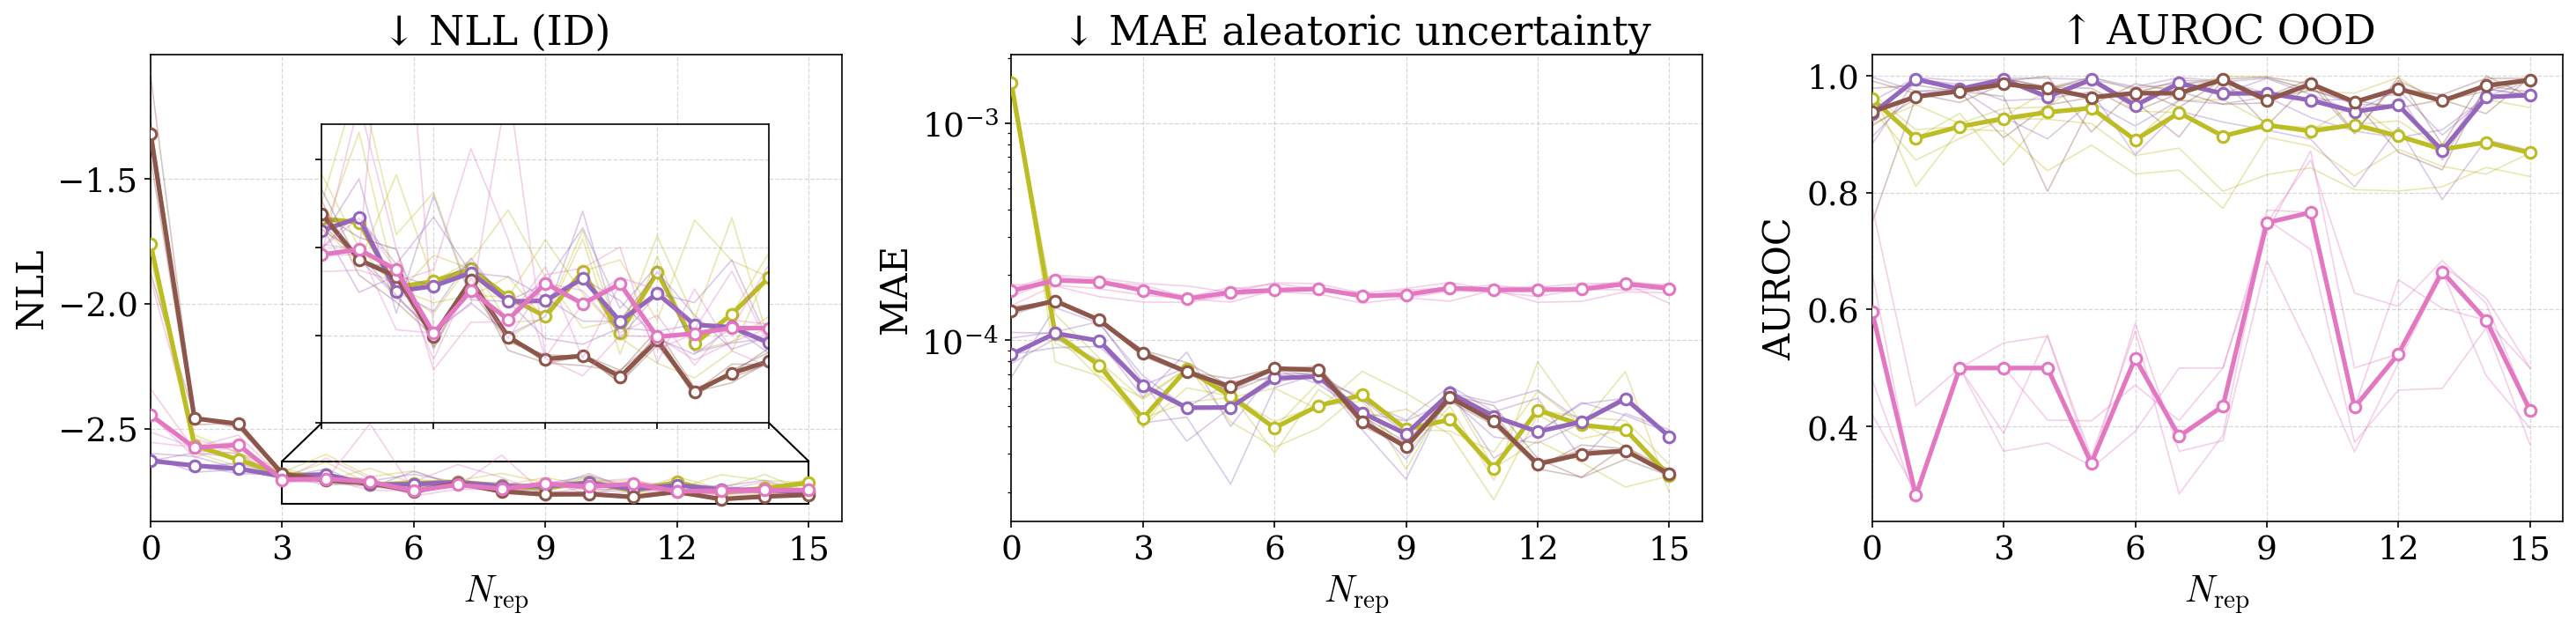

In [12]:
fig, axs = plot_metrics_grid_exp2(
    df_metrics=eval_df_exp2,
    model_col="model_name",
    config_col="train_repeats",
    metric_bases=("nll_id", "mae_aleatoric", "auroc_ood"),
    mean_suffix="_median",
    bottom_titles=(
        "↓ NLL (ID)",                   # lower is better
        "↓ MAE aleatoric uncertainty",  # lower is better
        "↑ AUROC OOD",                  # higher is better
    ),
    figsize=(20, 6),
    show_runs=True,
    show_median_markers=True,

)

FigureSaver.save_fig(fig, "exp2_metrics")
